# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,167,110,51,104,191,57,12,213,31,24,162,226,674,190,68,18,2,191,199
1,42,94,49,87,137,54,11,158,43,20,162,178,366,186,75,5,5,183,194
2,412,80,43,71,133,60,7,150,45,19,146,170,330,176,81,6,15,180,184
3,521,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188
4,450,91,46,75,185,75,7,154,42,19,147,178,362,192,72,8,8,192,199
5,802,89,44,80,191,66,6,162,40,20,143,189,396,180,66,13,11,194,199
6,470,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194
7,96,89,42,80,151,62,6,144,46,19,139,166,308,170,74,17,13,185,189
8,194,92,37,86,167,60,7,158,42,20,131,181,373,144,68,9,21,190,196
9,730,101,55,107,200,61,11,225,30,25,178,228,730,204,74,8,35,187,201


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.732240,94.127505,45.083789,82.908925,170.635701,61.750455,8.528233,170.369763,40.577413,20.701275,148.384335,190.171220,448.167577,176.038251,72.322404,6.646630,12.681239,189.047359,195.730419
std,248.630077,8.440763,6.215730,15.836266,34.246134,7.965346,4.256985,33.630505,7.842189,2.623243,14.479907,32.119073,179.581288,33.248407,7.568415,5.147717,8.809337,6.092170,7.447395
min,0.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,149.000000,67.000000,2.000000,6.000000,185.000000,190.000000
50%,412.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,158.000000,43.000000,20.000000,147.000000,180.000000,368.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,644.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,604.000000,200.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,262.000000,59.000000,28.000000,182.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pd)
X_train_pd = scaler.transform(X_train_pd)
X_test_pd = scaler.transform(X_test_pd)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'C': [1.3, 1.5, 0.5, 0.97], 'multi_class': ['multinomial'], 'solver': ['saga'], 'tol': [1e-3], 'max_iter': [500]}
reg = LogisticRegression()
clf = GridSearchCV(reg, params, cv=5)
clf.fit(X_train_pd, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.3, 1.5, 0.5, 0.97], 'max_iter': [500],
                         'multi_class': ['multinomial'], 'solver': ['saga'],
                         'tol': [0.001]})

In [ ]:
clf.best_estimator_

LogisticRegression(C=0.5, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [ ]:
y_pred = clf.predict(X_test_pd)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))

accuracy 0.47474747474747475
f1_score 0.457704868231184


In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

%pip install scikit-plot

In [ ]:
%pip install scipy==1.11.4

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

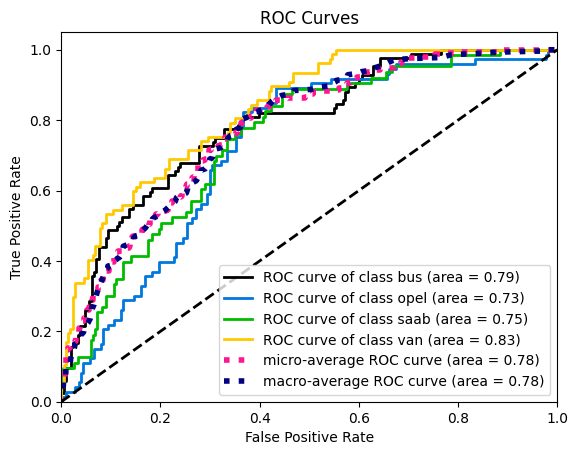

In [ ]:
import scikitplot
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test_pd))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

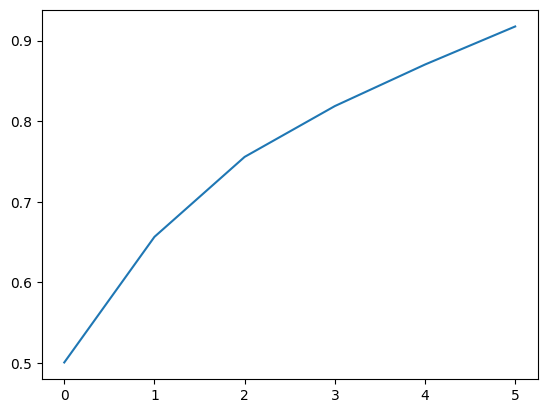

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA(n_components=6)
pca.fit(X_train_pd)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
X_test_pd = pca.transform(X_test_pd)

In [ ]:
X_train_pd = pca.transform(X_train_pd)

In [ ]:
# нужно нормализовать, уже ранее делали, 6 тк покрыли 100% дисперсии

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
params = {'C': [1.3, 1.5, 0.5, 0.97], 'multi_class': ['multinomial'], 'solver': ['saga'], 'tol': [1e-3], 'max_iter': [500]}
reg = LogisticRegression()
clf = GridSearchCV(reg, params, cv=5)
clf.fit(X_train_pd, y_train)
clf.best_estimator_
y_pred = clf.predict(X_test_pd)
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

accuracy 0.47474747474747475
f1_score 0.457704868231184


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

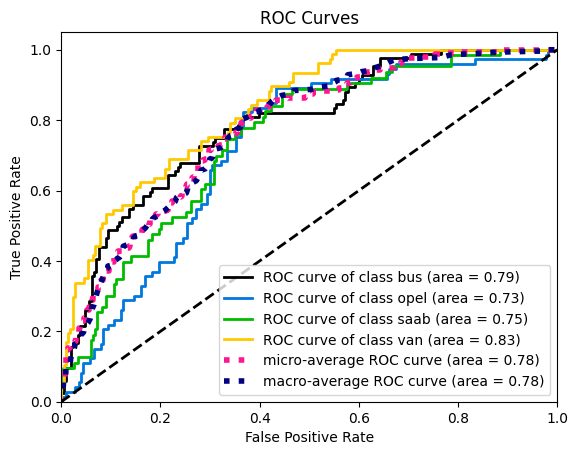

In [ ]:
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test_pd))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [3,5,7,10, 100]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, params, cv=5)
clf.fit(X_train_pd, y_train)
print(clf.best_estimator_)
y_pred = clf.predict(X_test_pd)
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))

DecisionTreeClassifier(max_depth=5)
accuracy 0.48484848484848486
f1_score 0.4655712724173707


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=LogisticRegression(C=0.5),
                        n_estimators=20, random_state=0)
clf.fit(X_train_pd, y_train)
y_pred = clf.predict(X_test_pd)
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))

accuracy 0.46464646464646464
f1_score 0.4484602353319995


In [ ]:
clf = BaggingClassifier(estimator=tree,
                        n_estimators=90, random_state=0)
clf.fit(X_train_pd, y_train)
y_pred = clf.predict(X_test_pd)
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))

accuracy 0.6127946127946128
f1_score 0.592086302713305


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=90)
forest.fit(X_train_pd, y_train)
y_pred = forest.predict(X_test_pd)
print('accuracy', accuracy_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred, average='macro'))
# YOUR CODE HERE

accuracy 0.6262626262626263
f1_score 0.6034697331740343


In [ ]:
# Оптимально то же кол-во деревьев, по сути беггинг деревьев то же самое, что и случайный лес

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
acc_scores = {'tree': [], 'forest': [], 'reg': []}
f1_scores =  {'tree': [], 'forest': [], 'reg': []}
reg = LogisticRegression(C=0.5)
tree =  DecisionTreeClassifier(max_depth=5)
models = {'tree': tree, 'forest': forest, 'reg': reg}
for i in range(1, 10):
  X_train_i = X_train_pd[:54*i]
  y_train_i = y_train[:54*i]
  for model in models:
    models[model].fit(X_train_i, y_train_i)
    pred = models[model].predict(X_test_pd)
    acc_scores[model].append(accuracy_score(y_test, pred))
    f1_scores[model].append(f1_score(y_test, pred, average='macro'))

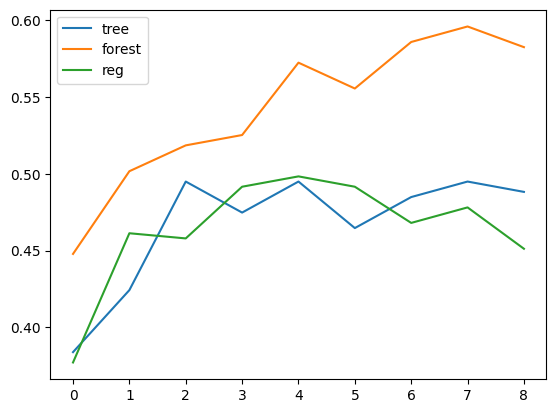

In [ ]:
for model in acc_scores:
  plt.plot(acc_scores[model], label=model)
plt.legend()
plt.show()

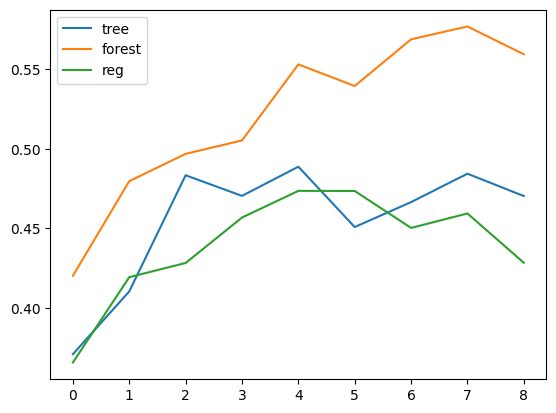

In [ ]:
for model in f1_scores:
  plt.plot(f1_scores[model], label=model)
plt.legend()
plt.show()

In [ ]:
# C ростом объема данных растет и качество, но начиная с какого-то размера выходит на плато, этот размер разный для разных моделей, чем сложнее модель, тем больше данных нужно

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import optuna

values = pd.unique(y_train)
y_train_dict = dict(zip(values, list(range(len(values)))))
y_train = pd.DataFrame(y_train, columns=['ytrain'])['ytrain'].map(y_train_dict)
y_test = pd.DataFrame(y_test, columns=['ytest'])['ytest'].map(y_train_dict)

def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'num_class': len(values),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
    }
    dtrain = xgb.DMatrix(X_train_pd, label=y_train)
    bst = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

    dtest = xgb.DMatrix(X_test_pd)
    preds = bst.predict(dtest)

    accuracy = accuracy_score(y_test, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2024-11-17 20:33:01,739] A new study created in memory with name: no-name-16e5496e-5373-434f-b578-300a77bbf1ff
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-17 20:33:03,114] Trial 0 finished with value: 0.6161616161616161 and parameters: {'n_estimators': 170}. Best is trial 0 with value: 0.6161616161616161.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-11-17 20:33:04,662] Trial 1 finished with value: 0.6127946127946128 and parameters: {'n_estimators': 187}. Best is trial 0 with value: 0.6161616161616161.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_est

In [ ]:
import lightgbm as lgb

def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': len(values),
        'metric': 'multi_logloss',
        'n_estimators': trial.suggest_int('n_estimators', 10, 20)
    }

    dtrain = lgb.Dataset(X_train_pd, label=y_train)
    bst = lgb.train(params, dtrain, num_boost_round=params['n_estimators'])

    preds = bst.predict(X_test_pd)
    preds_class = np.argmax(preds, axis=1)

    accuracy = accuracy_score(y_test, preds_class)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2024-11-17 20:37:31,937] A new study created in memory with name: no-name-67c60334-91f5-4cd4-beb5-dbb6e52e4977
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-11-17 20:37:32,070] Trial 0 finished with value: 0.5824915824915825 and parameters: {'n_estimators': 11}. Best is trial 0 with value: 0.5824915824915825.
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 549, number of used features: 6
[LightGBM] [Info] Start training from score -1.271146
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -1.410259
[LightGBM] [Info] Start training from score -1.373625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2024-11-17 20:37:32,514] Trial 1 finished with value: 0.5824915824915825 and parameters: {'n_estimators': 10}. Best is trial 0 with value: 0.5824915824915825.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-11-17 20:37:32,641] Trial 2 finished with value: 0.5824915824915825 and parameters: {'n_estimators': 10}. Best is trial 0 with value: 0.5824915824915825.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'loss_function': 'MultiClass',
        'eval_metric': 'MultiClass'
    }

    train_pool = Pool(X_train_pd, y_train)
    test_pool = Pool(X_test_pd, y_test)

    model = CatBoostClassifier(**params)
    model.fit(train_pool)

    preds = model.predict(test_pool)

    accuracy = accuracy_score(y_test, preds)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2024-11-17 20:40:48,571] A new study created in memory with name: no-name-350f5b17-6dc8-4522-846a-68f8f9a37904


Learning rate set to 0.361044
0:	learn: 1.2413963	total: 72.3ms	remaining: 11.5s
1:	learn: 1.1219149	total: 84.3ms	remaining: 6.66s
2:	learn: 1.0439231	total: 99.5ms	remaining: 5.21s
3:	learn: 1.0002245	total: 114ms	remaining: 4.43s
4:	learn: 0.9648706	total: 125ms	remaining: 3.87s
5:	learn: 0.9226373	total: 135ms	remaining: 3.47s
6:	learn: 0.8721732	total: 150ms	remaining: 3.29s
7:	learn: 0.8337554	total: 161ms	remaining: 3.05s
8:	learn: 0.8170802	total: 170ms	remaining: 2.85s
9:	learn: 0.7966947	total: 182ms	remaining: 2.72s
10:	learn: 0.7718968	total: 196ms	remaining: 2.65s
11:	learn: 0.7458491	total: 212ms	remaining: 2.61s
12:	learn: 0.7294178	total: 234ms	remaining: 2.65s
13:	learn: 0.7145616	total: 246ms	remaining: 2.57s
14:	learn: 0.7011150	total: 258ms	remaining: 2.49s
15:	learn: 0.6876269	total: 272ms	remaining: 2.45s
16:	learn: 0.6810441	total: 283ms	remaining: 2.38s
17:	learn: 0.6597328	total: 294ms	remaining: 2.32s
18:	learn: 0.6476673	total: 305ms	remaining: 2.26s
19:	lear

[I 2024-11-17 20:40:51,437] Trial 0 finished with value: 0.6161616161616161 and parameters: {'iterations': 160}. Best is trial 0 with value: 0.6161616161616161.


Learning rate set to 0.5
0:	learn: 1.1955054	total: 17.4ms	remaining: 1.13s
1:	learn: 1.0559867	total: 30.7ms	remaining: 983ms
2:	learn: 0.9690621	total: 52.6ms	remaining: 1.1s
3:	learn: 0.9234574	total: 69.6ms	remaining: 1.08s
4:	learn: 0.8854348	total: 87.5ms	remaining: 1.07s
5:	learn: 0.8385395	total: 102ms	remaining: 1.02s
6:	learn: 0.8081337	total: 112ms	remaining: 943ms
7:	learn: 0.7667989	total: 131ms	remaining: 949ms
8:	learn: 0.7515741	total: 146ms	remaining: 928ms
9:	learn: 0.7285958	total: 171ms	remaining: 958ms
10:	learn: 0.7024365	total: 196ms	remaining: 981ms
11:	learn: 0.6784474	total: 212ms	remaining: 952ms
12:	learn: 0.6618764	total: 236ms	remaining: 960ms
13:	learn: 0.6379714	total: 252ms	remaining: 935ms
14:	learn: 0.6186383	total: 261ms	remaining: 888ms
15:	learn: 0.6028354	total: 273ms	remaining: 853ms
16:	learn: 0.5887762	total: 290ms	remaining: 836ms
17:	learn: 0.5780908	total: 309ms	remaining: 823ms
18:	learn: 0.5611211	total: 331ms	remaining: 818ms
19:	learn: 0

[I 2024-11-17 20:40:52,837] Trial 1 finished with value: 0.6296296296296297 and parameters: {'iterations': 66}. Best is trial 1 with value: 0.6296296296296297.


64:	learn: 0.2125847	total: 1.23s	remaining: 18.9ms
65:	learn: 0.2086203	total: 1.25s	remaining: 0us
Learning rate set to 0.288083
0:	learn: 1.2677329	total: 26.9ms	remaining: 5.6s
1:	learn: 1.1583176	total: 38.4ms	remaining: 3.97s
2:	learn: 1.0885123	total: 48.9ms	remaining: 3.36s
3:	learn: 1.0353009	total: 60.8ms	remaining: 3.12s
4:	learn: 0.9950997	total: 72.5ms	remaining: 2.96s
5:	learn: 0.9520446	total: 84.3ms	remaining: 2.85s
6:	learn: 0.9059260	total: 123ms	remaining: 3.54s
7:	learn: 0.8708754	total: 163ms	remaining: 4.1s
8:	learn: 0.8558990	total: 198ms	remaining: 4.39s
9:	learn: 0.8321333	total: 210ms	remaining: 4.19s
10:	learn: 0.8090452	total: 245ms	remaining: 4.42s
11:	learn: 0.7899823	total: 263ms	remaining: 4.31s
12:	learn: 0.7750285	total: 288ms	remaining: 4.34s
13:	learn: 0.7509243	total: 302ms	remaining: 4.21s
14:	learn: 0.7384027	total: 313ms	remaining: 4.05s
15:	learn: 0.7302275	total: 338ms	remaining: 4.08s
16:	learn: 0.7148255	total: 362ms	remaining: 4.09s
17:	lear

[I 2024-11-17 20:40:55,807] Trial 2 finished with value: 0.6363636363636364 and parameters: {'iterations': 209}. Best is trial 2 with value: 0.6363636363636364.


206:	learn: 0.1065147	total: 2.56s	remaining: 24.7ms
207:	learn: 0.1057994	total: 2.56s	remaining: 12.3ms
208:	learn: 0.1051626	total: 2.58s	remaining: 0us
